In [1]:
import pandas as pd
from os import listdir as ld
from os.path import join
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [18]:
def dk(d, k=0):
    return list(d.values())[k]

In [19]:
rm -rf ../outputs/all/.ipynb_checkpoints/

In [26]:
d = {}
for i in ld('../outputs/all/'):
    d[i] = pd.read_csv(join('../outputs/all',i),sep=',')

In [27]:
len(d)

11

In [28]:
for v in d.values():
    print(v.shape)

(304, 31)
(348, 31)
(316, 31)
(324, 31)
(356, 31)
(324, 31)
(328, 31)
(332, 31)
(612, 31)
(276, 31)
(508, 31)


In [29]:
d.keys()

dict_keys(['0_to_100.csv', '100_to_200.csv', '200_to_300.csv', '300_to_400.csv', '400_to_500.csv', '500_to_600.csv', '600_to_700.csv', '700_to_800.csv', '900_to_1000.csv', '1000_to_1100.csv', 'ultimos.csv'])

In [30]:
df = pd.DataFrame()
for k,v in d.items():
    df = pd.concat((df,v),axis=0)

In [31]:
df.head()

,Unnamed: 0,Nome,Mês,Dia_leitura,Valores faltantes_mm,leituras faltantes_mm,valores_faltantes_fasorial,leituras_faltantes_fasorial,colunas_inconsistentes_fasorial,Perfil cadastrado,...,tensão mínima (100) - dias,tensão mínima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potência negativa - dias,potência negativa - minutos,anomalia de ângulos - dias,anomalia de ângulos - minutos
0,0,BT2A400076589,4,2019-04-27,0.0,0,X,X,X,1,...,X,X,X,X,X,X,X,X,X,X
1,1,BT2A400076589,5,2019-05-29,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",10,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",1,...,0,0,0,0.0,0,0,0,0,0,0
2,2,BT2A400076589,6,2019-06-28,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",15,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",1,...,0,0,0,0.0,0,0,0,0,0,0
3,3,BT2A400076589,7,2019-07-29,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",45,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",1,...,0,0,0,0.0,0,0,1,15,1,15
4,4,BT2A400085952,4,2019-04-24,0.0,0,X,X,X,1,...,X,X,X,X,X,X,X,X,X,X


In [33]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [35]:
df.columns

Index(['Nome', 'Mês', 'Dia_leitura', 'Valores faltantes_mm',
       'leituras faltantes_mm', 'valores_faltantes_fasorial',
       'leituras_faltantes_fasorial', 'colunas_inconsistentes_fasorial',
       'Perfil cadastrado', 'Cat Ramo-ativ original', 'Categoria-Mês',
       'Categorias-semanas', 'Diag Ramo-ativ', 'Degrau', 'Morro',
       'severidade-perfil', 'severidade-fasorial', 'DIAGNÓSTICO-FINAL',
       'Tensão zero - dias', 'Tensão zero - minutos',
       'tensão mínima (100) - dias', 'tensão mínima (100) - minutos',
       'corrente zero - dias', 'corrente zero -minutos',
       'corrente negativa - dias', 'corrente negativa -minutos',
       'potência negativa - dias', 'potência negativa - minutos',
       'anomalia de ângulos - dias', 'anomalia de ângulos - minutos'],
      dtype='object')

In [36]:
df.columns=['nome', 'mes', 'dia_leitura', 'Valores faltantes_mm',
       'leituras faltantes_mm', 'valores_faltantes_fasorial',
       'leituras_faltantes_fasorial', 'colunas_inconsistentes_fasorial',
       'Perfil cadastrado', 'Cat Ramo-ativ original', 'Categoria-Mes',
       'Categorias-semanas', 'Diag Ramo-ativ', 'Degrau', 'Morro',
       'severidade-perfil', 'severidade-fasorial', 'DIAGNOSTICO-FINAL',
       'tensao zero - dias', 'Tensao zero - minutos',
       'tensao minima (100) - dias', 'tensao minima (100) - minutos',
       'corrente zero - dias', 'corrente zero -minutos',
       'corrente negativa - dias', 'corrente negativa -minutos',
       'potencia negativa - dias', 'potencia negativa - minutos',
       'anomalia de angulos - dias', 'anomalia de angulos - minutos']

In [12]:
df.nome.nunique()

880

In [37]:
df2 = df[df['mes']!=4]

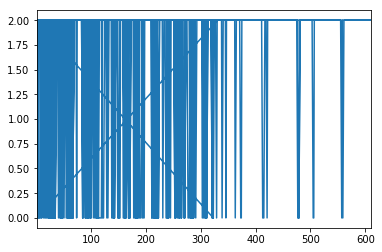

In [38]:
df2['severidade-perfil'].plot()

In [39]:
df2['severidade-fasorial'].dropna().value_counts()

0    1399
1     932
2     561
X     129
Name: severidade-fasorial, dtype: int64

In [40]:
df2[['nome','severidade-fasorial']].dropna().groupby('nome').max()['severidade-fasorial'].value_counts()

1    431
0    271
2    220
X     85
Name: severidade-fasorial, dtype: int64

l____________________________________________________________________________________________________________________________________________________________________________________

In [50]:
#PERFIS_PATH = '/home/ubuntu/data/data/maio_2019/perfis.csv'
PERFIS_PATH = '/home/ubuntu/data/data/maio_2019/setembro/perfis_v4.csv'
perfis = pd.read_csv(PERFIS_PATH, sep=';')

In [81]:
perfis.head()

,Unnamed: 0,instalacao,id,cpf_cnpj,razao social,endereco_cadastro,ramo_de_atividade,cat
0,0,BT2A400076589,400076589,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA+PE+JANUARIO+220+INHAUMA,Poder Publico Estadual,0.0
1,1,BT2A400085952,400085952,29468063000159,PCRJ SECRETARIA MUNICIPAL,RUA++EMILIO DE MENEZES+230+PIEDADE,Poder Publico Estadual,0.0
2,2,BT2A400086240,400086240,29468063000159,PCRJ SECRETARIA MUNICIPAL,AVENIDA++BRASIL+17879+IRAJA,Poder Publico Estadual,0.0
3,3,BT2A400091987,400091987,29468063000159,PCRJ SECRETARIA MUNICIPAL,PRACA++ZUINARA+1+COLEGIO,Poder Publico Estadual,0.0
4,4,BT2A400104752,400104752,29468063000159,PCRJ SECRETARIA MUNICIPAL,TRAVESSA++MANGUEIRA+1+CAJU,Poder Publico Estadual,0.0


In [82]:
perfis.columns

Index(['Unnamed: 0', 'instalacao', 'id', 'cpf_cnpj', 'razao social',
       'endereco_cadastro', 'ramo_de_atividade', 'cat'],
      dtype='object')

In [54]:
lper = list(perfis['ramo_de_atividade'].unique())

In [68]:
iper = perfis[['instalacao','ramo_de_atividade']]

In [72]:
diper = iper.set_index('instalacao').to_dict()['ramo_de_atividade']

In [58]:
lin = list(perfis['instalacao'].unique())

In [85]:
i2cat = perfis[['instalacao','cat']].set_index('instalacao').to_dict()['cat']

In [86]:
i2cat

{'BT2A400076589': 0.0,
 'BT2A400085952': 0.0,
 'BT2A400086240': 0.0,
 'BT2A400091987': 0.0,
 'BT2A400104752': 0.0,
 'BT2A400104884': 0.0,
 'BT2A400113506': 0.0,
 'BT2A400114162': 0.0,
 'BT2A400120332': 0.0,
 'BT2A400120898': 0.0,
 'BT2A400132810': 0.0,
 'BT2A400132870': 0.0,
 'BT2A400136450': 0.0,
 'BT2A400260487': 1.0,
 'BT2A400288195': 0.0,
 'BT2A400291188': 0.0,
 'BT2A400300110': 0.0,
 'BT2A400352837': 0.0,
 'BT2A400357847': 0.0,
 'BT2A400391131': 0.0,
 'BT2A400402672': 0.0,
 'BT2A400405116': 0.0,
 'BT2A410001280': 0.0,
 'BT2A410001603': 0.0,
 'BT2A410018693': 1.0,
 'BT2A410032723': 4.0,
 'BT2A410040647': 0.0,
 'BT2A410047095': 0.0,
 'BT2A410062626': 0.0,
 'BT2A410076151': 1.0,
 'BT2A410083876': 0.0,
 'BT2A410085766': 0.0,
 'BT2A410100693': 3.0,
 'BT2A410122181': 0.0,
 'BT2A410134082': 1.0,
 'BT2A410134354': 0.0,
 'BT2A410151342': 1.0,
 'BT2A410151989': 1.0,
 'BT2A410183430': 0.0,
 'BT2A410204435': 0.0,
 'BT2A410213480': 0.0,
 'BT2A410217918': 0.0,
 'BT2A410217995': 0.0,
 'BT2A41022

In [74]:
df2[~df2['nome'].isin(diper.keys())].shape

(69, 30)

In [42]:
iper = perfis.loc[:,'ramo_de_atividade_num']

In [77]:
df2['Perfil cadastrado'] = df2['nome'].map(diper)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df2['nome'].map(i2cat).isna().sum()

72

In [93]:
df2['Cat Ramo-ativ original'] = df2['nome'].map(i2cat)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df2.columns

Index(['nome', 'mes', 'dia_leitura', 'Valores faltantes_mm',
       'leituras faltantes_mm', 'valores_faltantes_fasorial',
       'leituras_faltantes_fasorial', 'colunas_inconsistentes_fasorial',
       'Perfil cadastrado', 'Cat Ramo-ativ original', 'Categoria-Mes',
       'Categorias-semanas', 'Diag Ramo-ativ', 'Degrau', 'Morro',
       'severidade-perfil', 'severidade-fasorial', 'DIAGNOSTICO-FINAL',
       'tensao zero - dias', 'Tensao zero - minutos',
       'tensao minima (100) - dias', 'tensao minima (100) - minutos',
       'corrente zero - dias', 'corrente zero -minutos',
       'corrente negativa - dias', 'corrente negativa -minutos',
       'potencia negativa - dias', 'potencia negativa - minutos',
       'anomalia de angulos - dias', 'anomalia de angulos - minutos'],
      dtype='object')

In [94]:
df2

,nome,mes,dia_leitura,Valores faltantes_mm,leituras faltantes_mm,valores_faltantes_fasorial,leituras_faltantes_fasorial,colunas_inconsistentes_fasorial,Perfil cadastrado,Cat Ramo-ativ original,...,tensao minima (100) - dias,tensao minima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potencia negativa - dias,potencia negativa - minutos,anomalia de angulos - dias,anomalia de angulos - minutos
1,BT2A400076589,5,2019-05-29,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",10,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0.0,0,0,0,0,0,0
2,BT2A400076589,6,2019-06-28,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",15,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0.0,0,0,0,0,0,0
3,BT2A400076589,7,2019-07-29,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",45,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0.0,0,0,1,15,1,15
5,BT2A400085952,5,2019-05-24,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",11,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0,0,0,2,30,0,0
6,BT2A400085952,6,2019-06-25,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",11,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0,0,0,0,0,0,0
7,BT2A400085952,7,2019-07-24,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",7,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0,0,0,2,30,0,0
9,BT2A400086240,5,2019-07-05,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",13,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,14,7050,0,0,0,0,0,0
10,BT2A400086240,6,2019-07-06,0.0,0,X,X,X,Poder Publico Estadual,0.0,...,X,X,X,X,X,X,X,X,X,X
11,BT2A400086240,7,2019-05-07,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",12,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0,0,0,0,0,1,15
13,BT2A400091987,5,2019-05-30,0.0,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",18,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",Poder Publico Estadual,0.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df2.to_csv('../data/all.csv')

l____________________________________________________________________________________________________________________________________________________________________________________

In [17]:
df3=df2.drop(columns=['Unnamed','dia_leitura','Valores faltantes_mm', 'leituras faltantes_mm','valores_faltantes_fasorial','Categorias-semanas', 'leituras_faltantes_fasorial','colunas_inconsistentes_fasorial','Perfil cadastrado'])

In [210]:
df3.to_csv('../outputs/all.csv')

In [18]:
df3.head()

,nome,mes,Cat Ramo-ativ original,Categoria-Mes,Diag Ramo-ativ,Degrau,Morro,severidade-perfil,severidade-fasorial,DIAGNOSTICO-FINAL,...,tensao minima (100) - dias,tensao minima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potencia negativa - dias,potencia negativa - minutos,anomalia de angulos - dias,anomalia de angulos - minutos
1,BT2A400076589,5,1,1,0,0,0,-1,0,0,...,0,0,0,0.0,0,0,0,0,0,0
2,BT2A400076589,6,1,1,0,0,0,-1,0,0,...,0,0,0,0.0,0,0,0,0,0,0
3,BT2A400076589,7,1,3,1,1,-1,-1,1,1,...,0,0,0,0.0,0,0,1,15,1,15
5,BT2A400085952,5,1,1,0,-1,0,-1,1,1,...,0,0,0,0,0,0,2,30,0,0
6,BT2A400085952,6,1,1,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df3.head()

,nome,mes,Cat Ramo-ativ original,Categoria-Mes,Diag Ramo-ativ,Degrau,Morro,severidade-perfil,severidade-fasorial,DIAGNOSTICO-FINAL,...,tensao minima (100) - dias,tensao minima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potencia negativa - dias,potencia negativa - minutos,anomalia de angulos - dias,anomalia de angulos - minutos
1,BT2A400076589,5,1,1,0,0,0,NaN,0,0,...,0,0,0,0.0,0,0,0,0,0,0
2,BT2A400076589,6,1,1,0,0,0,NaN,0,0,...,0,0,0,0.0,0,0,0,0,0,0
3,BT2A400076589,7,1,3,1,1,-1,NaN,1,1,...,0,0,0,0.0,0,0,1,15,1,15
5,BT2A400085952,5,1,1,0,-1,0,NaN,1,1,...,0,0,0,0,0,0,2,30,0,0
6,BT2A400085952,6,1,1,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df4 = pd.concat((df3.iloc[:,0],df3.iloc[:,1:].applymap(float)),axis=1)

In [43]:
df4['severidade-perfil'] = df4[['Diag Ramo-ativ','Degrau','Morro']].apply(max,axis=1)

In [45]:
df4[df4['severidade-fasorial']==2]

,nome,mes,Cat Ramo-ativ original,Categoria-Mes,Diag Ramo-ativ,Degrau,Morro,severidade-perfil,severidade-fasorial,DIAGNOSTICO-FINAL,...,tensao minima (100) - dias,tensao minima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potencia negativa - dias,potencia negativa - minutos,anomalia de angulos - dias,anomalia de angulos - minutos
21,BT2A400104884,5.0,1.0,2.0,1.0,-1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,5820.0,0.0,0.0
23,BT2A400104884,7.0,1.0,-1.0,-1.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,6450.0,0.0,0.0
61,BT2A400391131,5.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,30.0,16935.0,0.0,0.0,0.0,0.0,2.0,30.0
65,BT2A400405116,5.0,1.0,3.0,1.0,-1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,30.0,17700.0,0.0,0.0,0.0,0.0,1.0,15.0
66,BT2A400405116,6.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,30.0,17475.0,0.0,0.0,0.0,0.0,1.0,15.0
67,BT2A400405116,7.0,1.0,3.0,1.0,1.0,-1.0,1.0,2.0,3.0,...,0.0,0.0,30.0,17700.0,0.0,0.0,0.0,0.0,1.0,15.0
85,BT2A410040647,5.0,0.0,0.0,0.0,-1.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,23820.0,0.0,0.0
86,BT2A410040647,6.0,0.0,7.0,1.0,1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,26880.0,0.0,0.0
87,BT2A410040647,7.0,0.0,7.0,1.0,0.0,-1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,29505.0,0.0,0.0
153,BT2A410303893,5.0,1.0,7.0,1.0,-1.0,0.0,1.0,2.0,3.0,...,0.0,0.0,30.0,17550.0,0.0,0.0,0.0,0.0,2.0,30.0


In [46]:
df4.to_csv('../outputs/all.csv')

In [32]:
df4.columns

Index(['nome', 'mes', 'Cat Ramo-ativ original', 'Categoria-Mes',
       'Diag Ramo-ativ', 'Degrau', 'Morro', 'severidade-perfil',
       'severidade-fasorial', 'DIAGNOSTICO-FINAL', 'tensao zero - dias',
       'Tensao zero - minutos', 'tensao minima (100) - dias',
       'tensao minima (100) - minutos', 'corrente zero - dias',
       'corrente zero -minutos', 'corrente negativa - dias',
       'corrente negativa -minutos', 'potencia negativa - dias',
       'potencia negativa - minutos', 'anomalia de angulos - dias',
       'anomalia de angulos - minutos'],
      dtype='object')

In [33]:
l = [ 'tensao zero - dias',
       'Tensao zero - minutos', 'tensao minima (100) - dias',
       'tensao minima (100) - minutos', 'corrente zero - dias',
       'corrente zero -minutos', 'corrente negativa - dias',
       'corrente negativa -minutos', 'potencia negativa - dias',
       'potencia negativa - minutos', 'anomalia de angulos - dias',
       'anomalia de angulos - minutos']

In [34]:
for i in l:
    print(df4[i].value_counts)

<bound method IndexOpsMixin.value_counts of 1      0.0
2      0.0
3      0.0
5      0.0
6      0.0
7      0.0
9      0.0
10    -1.0
11     0.0
13     0.0
14     0.0
15     0.0
17     1.0
18    -1.0
19     0.0
21     0.0
22    -1.0
23     0.0
25     0.0
26     0.0
27     0.0
29     0.0
30     0.0
31     0.0
33     0.0
34     0.0
35     0.0
37     0.0
38     0.0
39     0.0
      ... 
469    0.0
470    0.0
471    0.0
473    0.0
474    0.0
475    0.0
477    0.0
478   -1.0
479    0.0
481    0.0
482    0.0
483    0.0
485    0.0
486    0.0
487    0.0
489    0.0
490    0.0
491    0.0
493    0.0
494    0.0
495    0.0
497    0.0
498   -1.0
499    0.0
501    0.0
502    0.0
503    2.0
505    0.0
506    0.0
507    0.0
Name: tensao zero - dias, Length: 3021, dtype: float64>
<bound method IndexOpsMixin.value_counts of 1        0.0
2        0.0
3        0.0
5        0.0
6        0.0
7        0.0
9        0.0
10      -1.0
11       0.0
13       0.0
14       0.0
15       0.0
17      15.0
18      -1.0
19 

In [207]:
15*4*24*30*4

172800

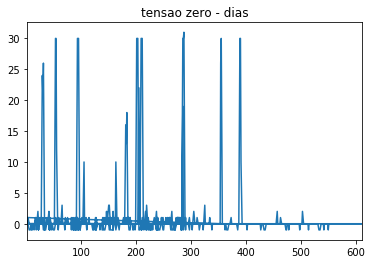

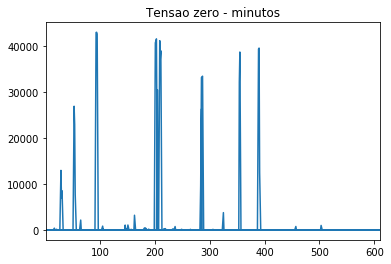

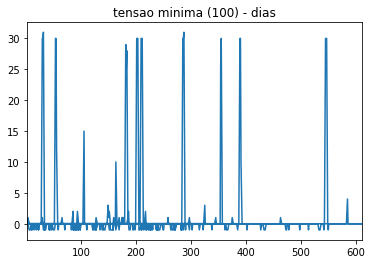

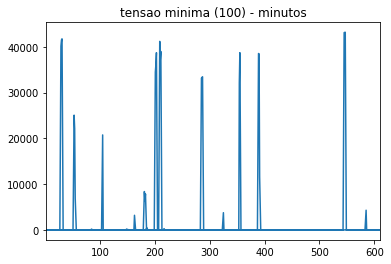

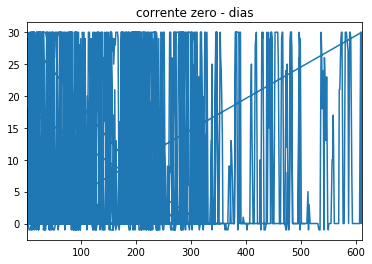

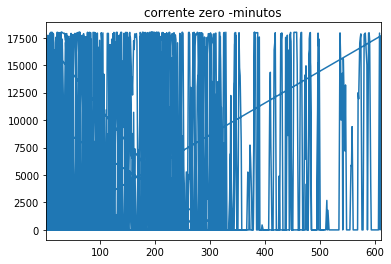

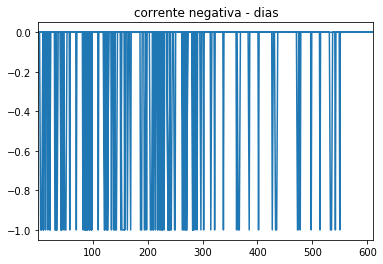

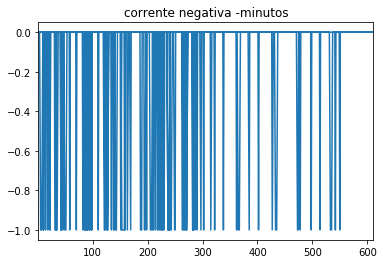

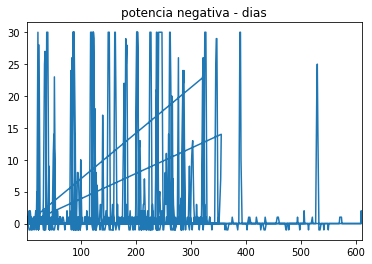

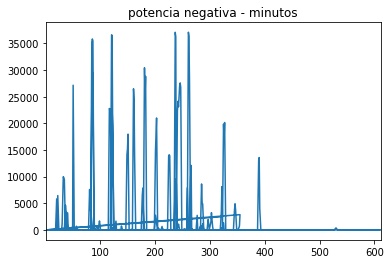

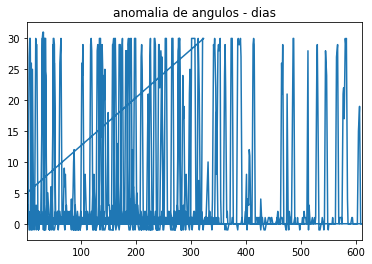

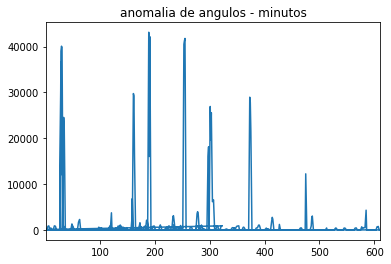

In [35]:
for i in l:
    f = plt.figure()
    df4[i].plot(title=i)

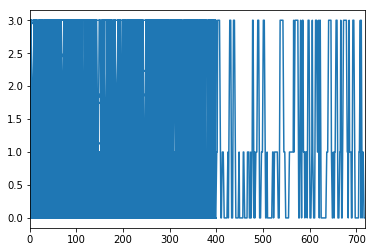

In [146]:
df4['DIAGNOSTICO-FINAL'].plot()

In [194]:
df4.dtypes

nome                              object
mes                              float64
Cat Ramo-ativ original           float64
Categoria-Mes                    float64
Diag Ramo-ativ                   float64
Degrau                           float64
Morro                            float64
severidade-perfil                float64
severidade-fasorial              float64
DIAGNOSTICO-FINAL                float64
tensao zero - dias               float64
Tensao zero - minutos            float64
tensao minima (100) - dias       float64
tensao minima (100) - minutos    float64
corrente zero - dias             float64
corrente zero -minutos           float64
corrente negativa - dias         float64
corrente negativa -minutos       float64
potencia negativa - dias         float64
potencia negativa - minutos      float64
anomalia de angulos - dias       float64
anomalia de angulos - minutos    float64
dtype: object

TypeError: -1 is not a string

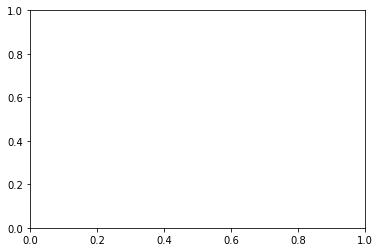

In [36]:
plt.plot(df2['severidade-fasorial'])

In [78]:
df.shape

(4848, 31)

In [79]:
df.isna().sum()

Unnamed                               0
nome                                  0
mes                                   0
dia_leitura                           0
Valores faltantes_mm                  0
leituras faltantes_mm                 0
valores_faltantes_fasorial         1330
leituras_faltantes_fasorial        1330
colunas_inconsistentes_fasorial    1330
Perfil cadastrado                     0
Cat Ramo-ativ original                0
Categoria-Mes                      1212
Categorias-semanas                 1212
Diag Ramo-ativ                     1212
Degrau                             1212
Morro                              1212
severidade-perfil                  3636
severidade-fasorial                1330
DIAGNOSTICO-FINAL                     0
tensaoo zero - dias                1330
Tensao zero - minutos              1330
tensao minima (100) - dias         1330
tensao minima (100) - minutos      1330
corrente zero - dias               1330
corrente zero -minutos             1330


In [52]:
df.head()

,Unnamed,nome,mes,dia_leitura,Valores faltantes_mm,leituras faltantes_mm,valores_faltantes_fasorial,leituras_faltantes_fasorial,colunas_inconsistentes_fasorial,Perfil cadastrado,...,tensao minima (100) - dias,tensao minima (100) - minutos,corrente zero - dias,corrente zero -minutos,corrente negativa - dias,corrente negativa -minutos,potencia negativa - dias,potencia negativa - minutos,anomalia de angulos - dias,anomalia de angulos - minutos
0,0,BT2A400076589,4,2019-04-30 00:00:00,BT2A400076589 0.0\ndtype: float64,0,NaN,NaN,NaN,N��o listado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BT2A400076589,5,2019-05-31 00:00:00,BT2A400076589 0.0\ndtype: float64,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",11,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",N��o listado,...,0,0,0,0.0,0,0,0,0,0,0
2,2,BT2A400076589,6,2019-06-30 00:00:00,BT2A400076589 0.0\ndtype: float64,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",14,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",N��o listado,...,0,0,0,0.0,0,0,0,0,0,0
3,3,BT2A400076589,7,2019-07-31 00:00:00,BT2A400076589 0.0\ndtype: float64,0,"{'IA': 0, 'IB': 0, 'IC': 0, 'AIA': 0, 'AIB': 0...",45,"['ponto_medicao', 'IA', 'IB', 'IC', 'VA', 'VB'...",N��o listado,...,0,0,0,0.0,0,0,1,15,1,15
4,4,BT2A400085952,4,2019-04-30 00:00:00,BT2A400085952 0.0\ndtype: float64,0,NaN,NaN,NaN,N��o listado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


l____________________________________________________________________________________________________________________________________________________________________________________

In [2]:
df4 = pd.read_csv('../outputs/all.csv')

In [19]:
li = pd.read_csv('/home/ubuntu/data/data/maio_2019/setembro/lista-cad-pnt-20190820.csv')

In [25]:
l = [i for i in set(li.iloc[:,1]) if i not in set(df4['nome']) if i]

In [26]:
len(l)

341

In [28]:
import pickle

In [29]:
with open('../pickles/erros1.pkl','wb') as p:
    pickle.dump(l,p)

In [30]:
pfas = '/home/ubuntu/data/data/maio_2019/setembro/fas_sep/'

In [31]:
from os.path import join

In [33]:
from os import listdir as ld

In [37]:
dfas = {}
for f in l:
    dfas[f] = pd.read_csv(join(pfas,f+'.csv'),sep=';')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,18,19,20,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: Dt

FileNotFoundError: [Errno 2] File b'/home/ubuntu/data/data/maio_2019/setembro/fas_sep/BTI414692427.csv' does not exist: b'/home/ubuntu/data/data/maio_2019/setembro/fas_sep/BTI414692427.csv'

In [38]:
dfas.keys()

dict_keys(['BTI420918527', 'BTI411056301', 'BTI411143321', 'BT2A410471219', 'BTI412682171', 'BT2A412438190', 'BTI413081598', 'BT2A412543213', 'BTI410431681', 'BT2A413253638', 'BT2A410750319', 'BT2A410204435', 'BT2A420231449', 'BT2A414407935', 'BT2A412744882', 'BT2A420269490', 'BTI420194513', 'BTI413017147', 'BTI410328848', 'BT2A410134082', 'BT2A411444175', 'BT2A410754661', 'BTI410792602', 'BTI412704269', 'BTI410119113', 'BTI412026240'])

In [39]:
dfas['BTI420918527']

,BTI420918527,08028224,400/5,1/1,4/10,01/04/2019 00:00:04,0,0.1,0.2,0.3,...,0.11,60,123,0.12,0.13,0.14,15838586,8257554,0.15,15
0,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:00:04,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
1,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:15:08,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
2,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:15:08,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
3,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:15:08,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
4,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:30:06,0,0,0,0,...,0,59,123,0,0,0,15838586,8257554,0,15
5,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:30:06,0,0,0,0,...,0,59,123,0,0,0,15838586,8257554,0,15
6,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:30:06,0,0,0,0,...,0,59,123,0,0,0,15838586,8257554,0,15
7,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:45:07,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
8,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:45:07,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15
9,BTI420918527,8028224,400/5,1/1,4/10,01/04/2019 00:45:07,0,0,0,0,...,0,60,123,0,0,0,15838586,8257554,0,15


In [41]:
n = [i.split('.')[0]  for i in ld(pfas)if i.split('.')[0]  not in l]

In [45]:
nf = pd.read_csv(join(pfas,n[0]+'.csv'), sep =';')

In [46]:
nf

,BTI400024830,08027241,400/5,1/1,4/10,01/04/2019 00:00:08,",07",0,0.1,308,...,0.8,60,132,6,7,0.9,10126854,1522269,3319,15
0,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:00:08,",07",0,0,308,...,0,60,132,6,7,0,10126854,1522269,3319,15
1,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:00:08,",07",0,0,308,...,0,60,132,6,7,0,10126854,1522269,3319,15
2,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:00:08,",07",0,0,308,...,0,60,132,6,7,0,10126854,1522269,3319,15
3,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:00:08,",07",0,0,308,...,0,60,132,6,7,0,10126854,1522269,3319,15
4,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
5,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
6,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
7,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
8,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
9,BTI400024830,8027241,400/5,1/1,4/10,01/04/2019 00:15:04,",12",0,0,307,...,0,60,132,6,7,0,10126860,1522276,3319,15
